In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

In [65]:
ls =[]

y = np.random.randint(3, 8, 1)
y

array([4])

In [66]:
def randNums(a,b,s):
    #finds n random ints in [a,b] with sum of s
    import numpy
    #select the number of layers randomly
    n = np.random.randint(3, 8, 1)
    hit = False
    while not hit:
      #declare number of layers and total thickness
        total, count = 0,0
      #declare a list to store the thicknesses
        nums = []
      #if the sum of the thicknesses is less than required
      #and number of layers is less tha  required
        while total < s and count < n:
          #generate a random number of layers
            r = np.random.randint(a,b)
            #add to total
            total += r
            #add 1 count
            count += 1
            #append to list
            nums.append(r)
        #if either of the 2 conditions are fulfiled, stop.
        if total == s and count == n: hit = True
    return nums

In [67]:
ls = []

for i in range(10000):
  a = randNums(5, 25, 50)
  global_main = np.zeros((a[0], 10))
  for i in range(global_main.shape[0]):
    global_main[i].fill(np.random.lognormal(2.5, 1))
  for i in range(1, len(a)):
    new = np.zeros((a[i], 10))
    for i in range(new.shape[0]):
      new[i].fill(np.random.lognormal(2.5, 1))
    global_main = np.concatenate((global_main, new), axis=0)
  ls.append(global_main)

len(ls)
data_train = np.array(ls)
data_train.shape
# for i in range(1, 10):
#   a = randNums(5, 25, 50)
#   main = np.zeros((a[0], 10))
#   for i in range(main.shape[0]):
#     main[i].fill(np.random.lognormal(2.5, 1))
#   for i in range(1, len(a)):
#     new = np.zeros((a[i], 10))
#     for i in range(new.shape[0]):
#       new[i].fill(np.random.lognormal(2.5, 1))
#   global_main = np.vstack((global_main, new))


(10000, 50, 10)

In [68]:
ls = []

for i in range(1000):
  a = randNums(5, 25, 50)
  global_main = np.zeros((a[0], 10))
  for i in range(global_main.shape[0]):
    global_main[i].fill(np.random.lognormal(2.5, 1))
  for i in range(1, len(a)):
    new = np.zeros((a[i], 10))
    for i in range(new.shape[0]):
      new[i].fill(np.random.lognormal(2.5, 1))
    global_main = np.concatenate((global_main, new), axis=0)
  ls.append(global_main)

len(ls)
data_test = np.array(ls)
data_test.shape

(1000, 50, 10)

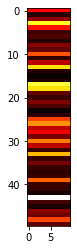

In [69]:
plt.imshow(data_train[0], cmap='hot', interpolation='nearest')
plt.show()

In [70]:
#flatten data
data_train = data_train.reshape((len(data_train), np.prod(data_train.shape[1:])))
data_test = data_test.reshape((len(data_test), np.prod(data_test.shape[1:])))

In [71]:
data_train.shape

(10000, 500)

In [ ]:
import pandas as pd
pd.

In [10]:
#construct the model
from keras import regularizers

#declare a size for the bottleneck
encoding_dim = 20 #compression of factor 25, assuming the input is 784 floats (28 by 28 pixels)

#input image size
input_img = keras.Input(shape=(500,))

#encoded representation of the input
encoded = layers.Dense(encoding_dim)(input_img)

#lossy representation of the input
decoded = layers.Dense(500)(encoded)

#Main model that maps input to output
autoencoder = keras.Model(input_img, decoded)

In [11]:
#mapping input to its encoded representation through a separate encoder model
encoder = keras.Model(input_img, encoded)

In [12]:
#creating a separate decoder 
encoded_input = keras.Input(shape=(encoding_dim,))
#retrieve the last layer of the autoencoder model
decoded_layer = autoencoder.layers[-1]
#create the decoder model
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [13]:
#confidure the model to use a per=pixel binary cross entropy loss, and the Adam optimizer
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy')

In [14]:
#train autoencoder for 50 epochs
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_train = min_max_scaler.fit_transform(data_train)
data_test = min_max_scaler.fit_transform(data_test)
autoencoder.fit(data_train, data_train, epochs=100, batch_size=256, shuffle=True, verbose=1, validation_data=(data_test, data_test))

Epoch 1/100
40/40 [==============================] - 1s 17ms/step - loss: 0.3526 - val_loss: 0.5963
Epoch 2/100
40/40 [==============================] - 0s 9ms/step - loss: 0.3180 - val_loss: 0.5545
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 0.2936 - val_loss: 0.5212
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2739 - val_loss: 0.4916
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2571 - val_loss: 0.4650
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2426 - val_loss: 0.4413
Epoch 7/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2307 - val_loss: 0.4219
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 0.2209 - val_loss: 0.4041
Epoch 9/100
40/40 [==============================] - 0s 9ms/step - loss: 0.2124 - val_loss: 0.3886
Epoch 10/100
40/40 [==============================] - 0s 8ms/step - loss: 0.2047 - val_loss: 0.3738
Epoch 1

In [53]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_train = min_max_scaler.fit_transform(data_train)
data_test = min_max_scaler.fit_transform(data_test)
input_img = keras.Input(shape=(500,))

#encoded and bottleneck layer
encoded = layers.Dense(150, activation='relu')(input_img)
encoded = layers.Dense(100, activation='relu')(encoded)
encoded = layers.Dense(50, activation='relu')(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)

#decoded and output layers
decoded = layers.Dense(50, activation='relu')(encoded)
decoded = layers.Dense(100, activation='relu')(decoded)
decoded = layers.Dense(150, activation='relu')(decoded)
decoded = layers.Dense(500, activation='sigmoid')(decoded)

In [55]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

autoencoder.fit(data_train, data_train, epochs=100, batch_size=256, shuffle = True, validation_data = (data_test, data_test))

Epoch 1/100
40/40 [==============================] - 1s 20ms/step - loss: 0.4123 - val_loss: 0.3246
Epoch 2/100
40/40 [==============================] - 1s 17ms/step - loss: 0.1670 - val_loss: 0.4044
Epoch 3/100
40/40 [==============================] - 1s 16ms/step - loss: 0.1632 - val_loss: 0.3847
Epoch 4/100
40/40 [==============================] - 1s 18ms/step - loss: 0.1625 - val_loss: 0.3757
Epoch 5/100
40/40 [==============================] - 1s 17ms/step - loss: 0.1614 - val_loss: 0.3740
Epoch 6/100
40/40 [==============================] - 1s 17ms/step - loss: 0.1594 - val_loss: 0.3142
Epoch 7/100
40/40 [==============================] - 1s 16ms/step - loss: 0.1566 - val_loss: 0.2587
Epoch 8/100
40/40 [==============================] - 1s 16ms/step - loss: 0.1551 - val_loss: 0.2445
Epoch 9/100
40/40 [==============================] - 1s 16ms/step - loss: 0.1550 - val_loss: 0.2446
Epoch 10/100
40/40 [==============================] - 1s 16ms/step - loss: 0.1550 - val_loss: 0.2446

In [51]:
decoded_imgs = autoencoder.predict(data_test)

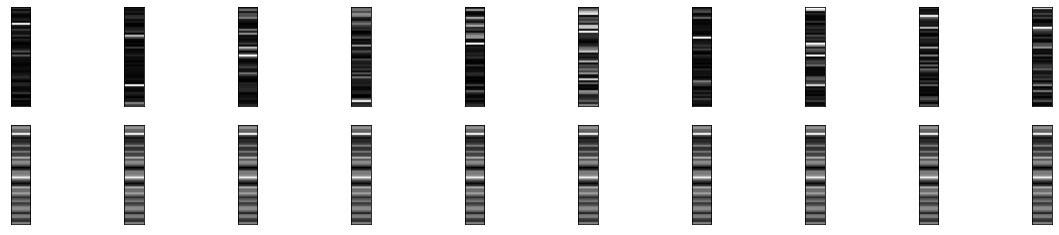

In [52]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(data_test[i].reshape(50, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(50, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [59]:
np.savetxt("train.csv", data_train, delimiter=",")

In [60]:
np.savetxt("test.csv", data_test, delimiter=",")

In [63]:
import pandas as pd
dat = pd.read_csv("train.csv").values
dat.shape

(9999, 500)

In [19]:
input_img = keras.Input(shape = (50, 10, 1))

x = layers.Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_img)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2, 2), padding = 'same')(x)

#Now the representation is (4, 4, 8), i.e 128-dimensional

x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3,3), activation = 'relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [26]:
data_test .shape

(1000, 50, 10, 1)

In [24]:
data_train = np.reshape(data_train, (len(data_train), 50, 10, 1))
data_test = np.reshape(data_test, (len(data_test), 50, 10, 1))

autoencoder.fit(data_train, data_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(data_test, data_test),
                )

Epoch 1/50


ValueError: ignored